In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd
path = "/content/drive/My Drive/Ocean Cleanup Project/Data_Level5_BAH_OceanCleanup.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line (1 yard/meter = 1 piece),Rope (1 yard/meter = 1 piece),Fishing Gear (Clean Swell),6-Pack Holders,Other Plastic/Foam Packaging,"Other Plastic Bottles (oil, bleach, etc.)",Strapping Bands,Tobacco Packaging/Wrap,Other Packaging (Clean Swell),"Appliances (refrigerators, washers, etc.)",Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected
0,86,"Cuyahoga County, OH, USA","Ohio, USA",United States,"41.49742, -81.56505","Land (beach, shoreline and inland)",12/22/2014,NaN,1.0,0.0,1.0,0.04,0.0090,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
1,87,"Fairfax County, VA, USA","Virginia, USA",United States,"38.87456, -77.24428","Land (beach, shoreline and inland)",12/24/2014,NaN,1.0,0.0,1.0,0.73,1.3903,0.0,1,0,0,1,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10.0
2,92,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.04405","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,1.0,0.63,0.0214,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,4.0
3,93,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,1.0,0.06,0.0302,0.0,1,0,0,0,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0
4,94,"Washington, DC, USA","District of Columbia, USA",United States,"38.90733, -77.0441","Land (beach, shoreline and inland)",2/19/2015,NaN,1.0,0.0,1.0,0.06,0.0302,0.0,1,0,0,0,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0


In [ ]:
data.shape
data.plot(x = state, y = pounds)

(37904, 61)

[Text(0, 0, 'Cigarette Butts'),
 Text(0, 0, 'Foam Pieces'),
 Text(0, 0, 'Plastic Pieces'),
 Text(0, 0, 'Food Wrappers (candy, chips, etc.)'),
 Text(0, 0, 'Bottle Caps (Plastic)'),
 Text(0, 0, 'Beverage Bottles (Plastic)'),
 Text(0, 0, 'Glass Pieces'),
 Text(0, 0, 'Straws, Stirrers'),
 Text(0, 0, 'Beverage Cans'),
 Text(0, 0, 'Beverage Bottles (Glass)')]

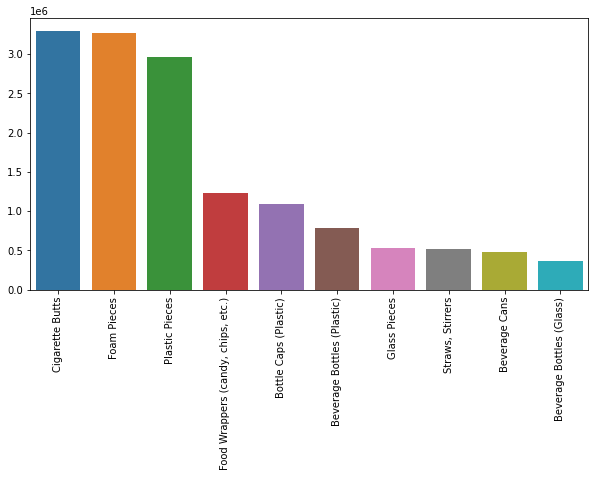

In [ ]:
import matplotlib.pyplot as plt

# fig,ax = plt.subplots()

# data['State'].value_counts().sort_index().plot.bar()
# plt.xlabel('')
# plt.show()
# name = 'Cleanup Type'
# names = list(data['Cleanup Type'].unique())


data1 = data.groupby('Cleanup Type')
data2 = data1.get_group('Land (beach, shoreline and inland)')
#data2.head()
data2 = data2.drop(labels=['Cleanup Type','Cleanup ID', 'Zone', 'Country', 'GPS', 'Cleanup Date', 'Group Name', 'Adults', 'Children', 'People', 'Pounds', 'Miles', '# of bags', 'Total Items Collected'], axis =1)
clean = data2.sum()
clean = clean.sort_values(ascending=False)
clean = clean.head(10)
# print(clean)
# type(clean)

import seaborn as sns

# ax.invert_yaxis

plt.figure(figsize=(10,5))
chart = sns.barplot(clean.index, clean.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


[Text(0, 0, 'Appliances (refrigerators, washers, etc.)'),
 Text(0, 0, 'Syringes'),
 Text(0, 0, 'Condoms'),
 Text(0, 0, 'Fireworks'),
 Text(0, 0, 'Diapers'),
 Text(0, 0, 'Personal Hygiene (Clean Swell)'),
 Text(0, 0, 'Tampons/Tampon Applicators'),
 Text(0, 0, '6-Pack Holders'),
 Text(0, 0, 'Toys'),
 Text(0, 0, 'Strapping Bands')]

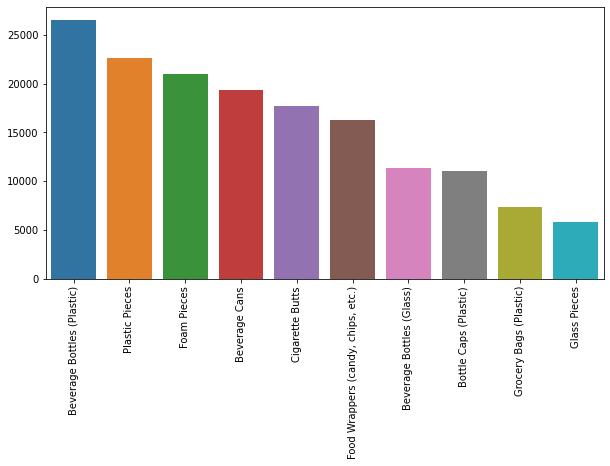

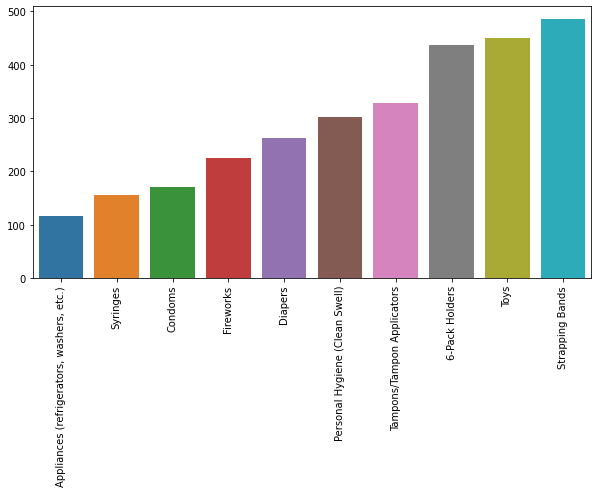

In [ ]:
import matplotlib.pyplot as plt
data1 = data.groupby('Cleanup Type')
data2 = data1.get_group('Watercraft (powerboat, sailboat, kayak or canoe)')
#data2.head()
data2 = data2.drop(labels=['Cleanup Type','Cleanup ID', 'Zone', 'State', 'Country', 'GPS', 'Cleanup Date', 'Group Name', 'Adults', 'Children', 'People', 'Pounds', 'Miles', '# of bags', 'Total Items Collected'], axis =1)
clean = data2.sum()
clean = clean.sort_values(ascending=False)
clean = clean.head(10)
# print(clean)
# type(clean)

import seaborn as sns


# ax.invert_yaxis

plt.figure(figsize=(10,5))
chart = sns.barplot(clean.index, clean.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

clean = data2.sum()
clean = clean.sort_values()
clean = clean.head(10)


plt.figure(figsize=(10,5))
chart = sns.barplot(clean.index, clean.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)



[Text(0, 0, 'Fishing Line (1 yard/meter = 1 piece)'),
 Text(0, 0, 'Plastic Pieces'),
 Text(0, 0, 'Cigarette Butts'),
 Text(0, 0, 'Beverage Cans'),
 Text(0, 0, 'Food Wrappers (candy, chips, etc.)'),
 Text(0, 0, 'Beverage Bottles (Plastic)'),
 Text(0, 0, 'Bottle Caps (Plastic)'),
 Text(0, 0, 'Beverage Bottles (Glass)'),
 Text(0, 0, 'Other Plastic Bags'),
 Text(0, 0, 'Grocery Bags (Plastic)')]

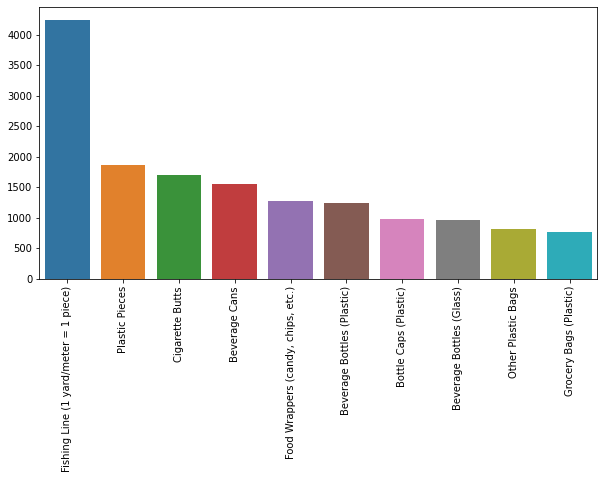

In [ ]:
import matplotlib.pyplot as plt
data1 = data.groupby('Cleanup Type')
data2 = data1.get_group('Underwater')
#data2.head()
data2 = data2.drop(labels=['Cleanup Type','Cleanup ID', 'Zone', 'State', 'Country', 'GPS', 'Cleanup Date', 'Group Name', 'Adults', 'Children', 'People', 'Pounds', 'Miles', '# of bags', 'Total Items Collected'], axis =1)
clean = data2.sum()
clean = clean.sort_values(ascending=False)
clean = clean.head(10)
# print(clean)
# type(clean)

import seaborn as sns


# ax.invert_yaxis

plt.figure(figsize=(10,5))
chart = sns.barplot(clean.index, clean.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [ ]:
# d1 = new_data.get_group('Ohio, USA')
new_data = data[["State", "Adults", "Children", "Pounds"]]
new_data.head()

d1 = pd.DataFrame(new_data.groupby('State')['Adults', 'Children','Pounds'].sum())
d1.reset_index(level=0, inplace=True)
# d1.columns = ['State', 'No. of Adults']
# df.groupby(['Fruit','Name'])['Number'].sum()

d1 = d1.drop([8,37,45], axis = 0)

d1['codes'] = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
d1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,State,Adults,Children,Pounds,codes
0,"Alabama, USA",8242.0,3037.0,8.980525e+04,AL
1,"Alaska, USA",817.0,715.0,7.491390e+03,AK
2,"Arizona, USA",2672.0,495.0,4.715781e+05,AZ
3,"Arkansas, USA",176.0,32.0,2.164500e+03,AR
4,"California, USA",205635.0,15260.0,2.392757e+06,CA


In [ ]:
d1['t'] = 'Adults: ' + d1['Adults'].astype(str) + '<br>' + 'Children: ' + d1['Children'].astype(str) + '<br>'

import plotly.express as px  # Be sure to import express
fig = px.choropleth(d1,  # Input Pandas DataFrame
                    locations="codes",  # DataFrame column with locations
                    color="Pounds",  # DataFrame column with color values
                    hover_name="State",
                    hover_data = "t", #DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Volume of garbage cleaned per state', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()